
Date: 14/04/2019

Environment: Python 3.7.0 and Anaconda3 5.2.0(64-bit)

Libraries used:

* re 2.2.1 (for regular expression, included in Anaconda Python 3.7.0)
* pandas (for dataframe, included in Anaconda Python 3.7.0)
* nltk (for text processing)
* itertools (for converting dictionary values to list)

## 1. Introduction
This assessment involves converting unit information into numerical representation suitable as input for various systems such as  recommender system or for information retrieval system. 

The rules to be followed are:

1. The word tokenization must use the following regular expression, "\w+(?:[-']\w+)?"
2. The context-independent and context-dependent (with the threshold set to %95) stop words must be removed from the vocab. The stop words list (i.e, stopwords_en.txt )provided in the zip file must be used.
3. Tokens should be stemmed using the Porter stemmer.
4. Rare tokens (with the threshold set to %5) must be removed from the vocab.
5. Tokens must be normalized to lowercase except the capital tokens appeared in the middle of a sentence/line.
6. Tokens with the length less than 3 should be removed from the vocab.
7. First 200 meaningful bigrams (i.e., collocations) must be included in the vocab using PMI measure.




## 2. Import libraries

In [1]:
import re
import pandas as pd
import nltk
from itertools import chain

## 3. Before loading data
### Converting PDF to Excel

The PDF data containing three columns namley, Title(unitname), Synopsis, and Outcome is converted to Excel format.
The PDF to Excel conversion is done in using website https://simplypdf.com/Excel.
    
The xlsx file named 29915651.xlsx is loaded for further text processing
    



## 4A. Examining and Loading data

As a first step, the file 29915651.xlsx will be loaded so its first 10 lines can be inspected.

In [2]:
data = pd.read_excel('C:/Users/Stephy/Documents/Studies/Data Science 2018/Sem 2/Wrangling/Assignment1/James_29915651_Assig1/29915651.xlsx')
data.head()

,Title,Synopsis,Outcomes
0,VPR2011,Research Practices Advanced is a core unit in ...,['Initiate a broad range of conceptual and ana...
1,VCO2304,This elective builds upon the core unit VCO130...,['Effectively use the elements and principles ...
2,FIT3176,This unit will introduce advanced concepts in ...,['design a database model from a given scenari...
3,FIT5127,This unit is a research unit common to FIT Mas...,['design a rigorous Masters level research pro...
4,EAE3152,The motion of a density-stratified fluid in a ...,['Discuss the physical theory of the motion of...


In [3]:
type(data)

#find the number of rows in dataframe
data.shape[0] 

#count of rows in data
rowcnt = data.shape[0]

#extracting Title
Title = data.Title[0:rowcnt]
#Ref: https://stackoverflow.com/questions/15112234/how-can-i-convert-a-pandas-dataframe-into-a-list
print(len(Title.unique())) #3 duplicated units

#extracting Synopsis
Synopsis = data.Synopsis[0:rowcnt]
synopsis_list = list(Synopsis.values.flatten())

#extracting Outcomes
Outcomes = data.Outcomes[0:rowcnt]
outcome_list = list(Outcomes.values.flatten())


197


It can be seen that there are 197 unique unit codes 

## 4B. Methodology breif

1. As okens must be normalized to lowercase except the capital tokens appeared in the middle of a sentence/line, the first step is to convert all the fisrt letter with capital first alphabets to lower case. This is done for both synopsis and outcome.

2. In the second step both synopsis and outcome is combined as string corresponding to its unit code.

3. The unit detail string composed of unit synopsis and unit outcome is tokenized.

4. 200 Bigrams are generated from the tokenized content using PMI measure. 

5. The bigrams are then added to the unit content and the content is retokenized.

6. The context independent stop words (from the stopword_en) are removed from the tokens.

7. The context dependent stopwards are removed from the above tokens
   It is done in three stages
   a. Removal of words appearing in more than 95% document
   b. Removal of words appearing in less than 5%document
   c. Removal of word with length less than 3
   
8. Stemming is done using Porter Stem method.

9. The vocab file inclusive of bigarms and unigrams is generated in the token_string:integer_index format.

10. Sparse represenation of file is created in the format unit_code, token1_index:wordcount, token2_index:wordcount,...



## 5. Converting the first letter of each sentence to lower case 

Tokens need to be normalized to lowercase except the capital tokens appearing in the middle of a sentence/line.

In [4]:
#import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

#the first word of each line/sentence is converted to lower case for synopsis
#sent_detector.tokenize from nltk.data is used to extract sentences
synopsis_new=[]
for i in range (0,rowcnt): 
    raw_text = str(synopsis_list[i])
    sentences = sent_detector.tokenize(raw_text.strip())
    #newsent=[]
    string = ""
    for sent in sentences:
        first_word=re.match('\w*\s?', sent)
        #replace first occurance
        sent  = sent.replace(first_word[0], first_word[0].lower(), 1)
        string = string +" "+sent
    #print(string)
    synopsis_new.append(string)   

    

In [5]:
#checking if the new and old synopsis list is the same except for case change of first letter
print(synopsis_list[199])
print(synopsis_new[199])
    

The unit will cover the clinical and non-clinical topics listed below, enabling appropriate management of palliative care patients.
 the unit will cover the clinical and non-clinical topics listed below, enabling appropriate management of palliative care patients.


The difference in terms of lower case for first letter of a sentence can be observed for synopsis of the last unit 

In [6]:
#import nltk.data
#sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

#the first word of each line/sentence is converted to lower case for outcome
#sent_detector.tokenize from nltk.data is used to extract sentences
outcome_final =[]
outcome_new=[]
for i in range (rowcnt): 
    raw_text = str(outcome_list[i])
    sentences = sent_detector.tokenize(raw_text.strip()) 
    for sent in sentences:
        sent = sent.split("', '")
        each_line = ""
        for each in sent:
            each = each.replace("['", "")
            first_word=re.match('\w*\s?', each)
            #print(each)
            each  = each.replace(first_word[0], first_word[0].lower(), 1)
            #each = each.strip()
            each_line = each_line+" "+each
            #print(each_line)
        outcome_new.append(each_line)
        outcome_new1 = ' '.join(outcome_new)
        
    outcome_final.append(outcome_new1)
    outcome_new=[]
    

In [7]:
print(outcome_list[199])
print(outcome_final[199])

['Integrate clinical assessments and patient history to develop evidence-based clinical management plans in palliative care.', 'Justify evidence based pharmacological recommendations relating to palliative care to healthcare consumers including patients, family members and multi-disciplinary healthcare professionals.', 'Recognise, monitor, and manage (pharmacologically and
non-pharmacologically) symptoms and treatment side-effects common in palliative care.', 'Apply the principles of quality use of medicines in prescribing and de-prescribing in palliative care.', 'Critically reflect on their individual learning process and progress in clinical competence.']
 integrate clinical assessments and patient history to develop evidence-based clinical management plans in palliative care.   justify evidence based pharmacological recommendations relating to palliative care to healthcare consumers including patients, family members and multi-disciplinary healthcare professionals.   recognise, moni

The difference in terms of lower case for first letter of a sentence can be observed for outcome fpr the last unit 

## 6.Combining the outcome and synopsis list with title list

In [8]:
#combining the outcome and synopsis list with title list
unit_dtl={}

for i in range(rowcnt):
   
    value = str(str(synopsis_new[i]) +" "+str(outcome_final[i]))
    #key is unit_dtl[data.Title[i]]
    unit_dtl[data.Title[i]] = value

#checking for one unit
print(unit_dtl['PGC5118'])

#number of unique units 
len(unit_dtl.keys())

unitcount = len(unit_dtl.keys())


 the unit will cover the clinical and non-clinical topics listed below, enabling appropriate management of palliative care patients.  integrate clinical assessments and patient history to develop evidence-based clinical management plans in palliative care.   justify evidence based pharmacological recommendations relating to palliative care to healthcare consumers including patients, family members and multi-disciplinary healthcare professionals.   recognise, monitor, and manage (pharmacologically and
non-pharmacologically) symptoms and treatment side-effects common in palliative care.   apply the principles of quality use of medicines in prescribing and de-prescribing in palliative care.   critically reflect on their individual learning process and progress in clinical competence.']


The example of unit 'PGC5118' is used to explain how the synopsis and outcome of the unit is combined corresponding to it unit code

## 7. Tokenize

In [ ]:
#creating a new dictionary with unit names and corresponding tokens
#this dictionary will contain the unit id and its corresponding tokens
unit_tokens  = {}

from nltk.tokenize import RegexpTokenizer 
#pattern as specified in assignment
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")

for i in range(rowcnt):
    #text to be tokenized
    raw_text = unit_dtl.get(Title[i])
    unit_tokens[Title[i]] = tokenizer.tokenize(raw_text)

#checking one unit 
print(unit_tokens['PGC5118'])

#number of unique units 
len(unit_tokens.keys())

From the step before tokenization, one can observe the differnce between tokens and a normal string. Each word is separated as token using tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?") from the RegexpTokenizer function of nltk.tokenize 

"RegexpTokenizer splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences" - https://www.nltk.org/_modules/nltk/tokenize/regexp.html



In [10]:
print("Unit id"+"\t\t"+"Tokens#")

for i in range(0,5):
    tokens=len(set(unit_tokens[Title[i]]))
    tokens_flg=0
    tokens_flg = tokens_flg+tokens
    print(Title[i],"\t" ,tokens_flg)


Unit id		Tokens#
VPR2011 	 186
VCO2304 	 126
FIT3176 	 55
FIT5127 	 69
EAE3152 	 65


The number of tokens corresponding to few units is mentioned

In [11]:
#Ref: Exploring Pre-Processed text and Generating Features Tutorial

#The words and vocab checked
words = list(chain.from_iterable(unit_tokens.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)


Vocabulary size:  4098 
Total number of tokens:  31470 
Lexical diversity:  7.679355783308931


## 8.  Generating the 200 bigram collocations using PMI measure
The next step is go generate the bigram collocations, given the tokenized unit information.

The function BigramCollocationFinder.from_words() (NLTK Project, 2015) generate pairs of words that occur together. The apply_ngram_filter() (NLTK Project, 2015) is used to ensure no two stop words occur together.
Additionally, bigrams can be filtered by their frequency using apply_freq_filter.

PMI association measures the likelihood of two words occurring together given individual distributions in the corpus (Bouma, 2009).Lowering the frequency removes these obscure stop word pairs and by also using the PMI filter, new meaningful pairs with high scores can climb to the top results. 

In this case, bigrams with less than 3 occurrences and word length less than 3 are filtered while applying PMI at the same time.

Reference for BigramCollocationFinder and PMI explanation: example_code_quality_comment_1 tutorial

Steps:

Step1:For this all the tokenized unit details are concatenated using the chain.frome_iterable function. A list containing a list of all the words seprated by while space is returned.

In [12]:
from itertools import chain
all_words = list(chain.from_iterable(unit_tokens.values()))
print(all_words[0:10])

['research', 'Practices', 'Advanced', 'is', 'a', 'core', 'unit', 'in', 'the', 'Visual']


Ref: http://www.nltk.org/howto/collocations.html

Step2: Generate the 200 bigram cllocations using
* BigramAssocMeasures()
* BigramCollocationFinder.from_words()
* apply_freq_filter(20)
* apply_word_filter(lambda w: len(w) < 3)
* nbest(bigram_measures.pmi, 100)

In [13]:
#Ref: tutorial_05_answer
    
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(all_words)
#ignoring all bigrams which occur less than three times 
bigram_finder.apply_freq_filter(3)
#ignoring words which are less than 3 character in length to remove bigrams like ('n', 'nStudents')
bigram_finder.apply_word_filter(lambda w: len(w) < 3)
top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams
top_200_bigrams

[('Daily', 'Living'),
 ('Living', 'Technologies'),
 ('Mobility', 'Augmentative'),
 ('New', 'Kingdom'),
 ('Organisational', 'Behaviour'),
 ('Positioning', 'Mobility'),
 ('bones', 'girdles'),
 ('digestive', 'urinary'),
 ('segmentation', 'targeting'),
 ('Alternative', 'Communication'),
 ('International', 'Relations'),
 ('travel', 'demand'),
 ('confidence', 'intervals'),
 ('Assistive', 'Technology'),
 ('Social', 'Workers'),
 ('Technology', 'Access'),
 ('long', 'bones'),
 ('lower', 'digestive'),
 ('lower', 'respiratory'),
 ('criminal', 'justice'),
 ('Additive', 'Manufacturing'),
 ('taxable', 'income'),
 ('additive', 'manufacturing'),
 ('lobby', 'groups'),
 ('metal', 'complexes'),
 ('gene', 'expression'),
 ('Information', 'Systems'),
 ('radiographic', 'images'),
 ('debt', 'instruments'),
 ('businesses', 'operating'),
 ('twentieth', 'century'),
 ('random', 'variables'),
 ('controlling', 'chosen'),
 ('South', 'African'),
 ('ideological', 'critiques'),
 ('pressure', 'injuries'),
 ('21st', 'cent

The example of bigrams are mentioned in the above output.
It is worthwhile to mention again that only meaningful bigrams have been connsidered by removing bigrams that occur less than 3 times and by removing bigrams with word length less than 3 .

## 9. Re-tokenizing the unit details post finding bigrams
In Section 7 the tokenization was done with only unigrams. 
In this steps the 200 meaningful bigrams are also introduced into the text to tokenzie with the bigrams
The tokenizer used is MWEtokenizer.

"MWETokenizer takes a string which has already been divided into tokens and retokenizes it, merging multi-word expressions into single tokens, using a lexicon of MWEs"
Ref https://www.nltk.org/_modules/nltk/tokenize/mwe.html


In [14]:
#unit id with corresponding tokens inclusive of bigrams
colloc_unit = {}

from nltk.tokenize import MWETokenizer

mwetokenizer = MWETokenizer(top_200_bigrams)
colloc_unit =  dict((unit_id, mwetokenizer.tokenize(unit_content)) for unit_id,unit_content in unit_tokens.items())

print(unit_tokens['PGC5118'])
print(colloc_unit['PGC5118'])


['the', 'unit', 'will', 'cover', 'the', 'clinical', 'and', 'non-clinical', 'topics', 'listed', 'below', 'enabling', 'appropriate', 'management', 'of', 'palliative', 'care', 'patients', 'integrate', 'clinical', 'assessments', 'and', 'patient', 'history', 'to', 'develop', 'evidence-based', 'clinical', 'management', 'plans', 'in', 'palliative', 'care', 'justify', 'evidence', 'based', 'pharmacological', 'recommendations', 'relating', 'to', 'palliative', 'care', 'to', 'healthcare', 'consumers', 'including', 'patients', 'family', 'members', 'and', 'multi-disciplinary', 'healthcare', 'professionals', 'recognise', 'monitor', 'and', 'manage', 'pharmacologically', 'and', 'non-pharmacologically', 'symptoms', 'and', 'treatment', 'side-effects', 'common', 'in', 'palliative', 'care', 'apply', 'the', 'principles', 'of', 'quality', 'use', 'of', 'medicines', 'in', 'prescribing', 'and', 'de-prescribing', 'in', 'palliative', 'care', 'critically', 'reflect', 'on', 'their', 'individual', 'learning', 'proce

The example of unit PGC5118 shows the difference between tokens wthout bigrams and with bigrams. Consider the words 'palliative', 'care' in the intianl list tokens. It has been changed to palliative_care post including bigrams.

In [15]:
print("Unit id"+"\t\t"+"Tokens(including bigarms)#")

for i in range(0,5):
    tokens=len(set(colloc_unit[Title[i]]))
    tokens_flg = 0
    tokens_flg = tokens_flg+tokens
    print(Title[i],"\t" ,tokens_flg)

Unit id		Tokens(including bigarms)#
VPR2011 	 184
VCO2304 	 123
FIT3176 	 55
FIT5127 	 67
EAE3152 	 64


In [16]:
word_with_bigram = list(chain.from_iterable(colloc_unit.values()))
vocab_with_bigram = list(set(word_with_bigram))
lexical_diversity = len(word_with_bigram)/len(word_with_bigram)
print ("Vocabulary size with bigram: ",len(vocab_with_bigram),"\nTotal number of tokens (with bigram): ", len(word_with_bigram))

Vocabulary size with bigram:  4242 
Total number of tokens (with bigram):  30563


The vocabulary size had increased, post inclusion of bigrams though the number of token has decreased to 30563

## 10. Stop Words Removal

Stop words carry little meaning with respect to text content; they are mostly supporting words such as articles, pronouns, etc.
The context-independent and context-dependent (with the threshold set to %95) stop words need to be removed from the vocab.
The stop words list (i.e, stopwords_en.txt) provided as per assignment guidelines is used.

### 10A. Removing context independent words
All the stopwords in the stopword file are context independent hence they are removed


In [17]:
stopwordfile = open("C:/Users/Stephy/Documents/Studies/Data Science 2018/Sem 2/Wrangling/Assignment1/James_29915651_Assig1/stopwords_en.txt",'r')
stopwords = stopwordfile.read()
stopwordfile.close()

print(stopwords[0:10])

print(len(stopwords))


a
a's
able
3588


In [18]:
#Removing stop words 
#From retokined dict (colloc_unit) in which bigrams have been included 
#For each word in unit_dtl value, keep the word if the word is not in the stopwordsSet
unit_dtl_rsw = {}  
for i in range(len(Title)):
    unit_dtl_rsw[Title[i]] = [w for w in colloc_unit[Title[i]] if w not in stopwords]

In [19]:
words_rm_sw = list(chain.from_iterable(unit_dtl_rsw.values()))
vocab_rm = set(words_rm_sw)
print ("Vocabulary size after removing stop words: ",len(vocab_rm),"\nTotal number of tokens after removing stop words: ", len(words_rm_sw))


Vocabulary size after removing stop words:  3958 
Total number of tokens after removing stop words:  17810


In [43]:
print("Initial Vocab from unit content:",len(vocab))
print("Vocab before removing stopwords(inclusive of bigrams):",len(vocab_with_bigram))
print("Vocab after removing stopwords:",len(vocab_rm))

Initial Vocab from unit content: 4098
Vocab before removing stopwords(inclusive of bigrams): 4242
Vocab after removing stopwords: 3958


## 10B.Removing context dependent words

The context-dependent (with the threshold set to %95) of the document frequency needs to be removed. 

"The FreqDist class is used to encode “frequency distributions”, which count the number of times that each outcome of an experiment occurs"
Ref http://www.nltk.org/api/nltk.html?highlight=freqdist

In [44]:
#Exploring common words
from nltk.probability import *
fd_1 = FreqDist(words_rm_sw)
fd_1.most_common(10)

[('unit', 268),
 ('students', 220),
 ('research', 200),
 ('design', 168),
 ('skills', 149),
 ('practice', 134),
 ('apply', 129),
 ('develop', 113),
 ('management', 111),
 ('demonstrate', 108)]

The frequencies of the 25 most common word in among all units is plotted 

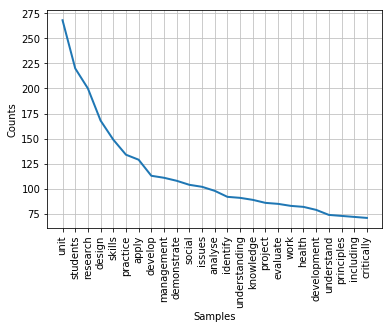

In [39]:
fd_1.plot(25, cumulative=False)

The most frequent words in terms of document frequency needs to be calculated. 
The count of how many document a word appears in is calculated, this is referred to as document frequency
FreqDist() jointly with set() is used for this purpose. 

1.Applying set() to each unit content to generate a set of unique words in a particular unit.
The step is useful as it makes each word in a unit's content count only once

2.The sets are then flattened using chain.from_iterable 

3.The list is passed through FreqDist
The count of word from the list is equal to the number of documents containing that word



In [23]:
#Applying set() to each unit content to generate a set of unique words in a particular unit 
#and save all sets in a list

uniq_in_unit = list(chain.from_iterable([set(value) for value in unit_dtl_rsw.values()]))
fd_2 = FreqDist(uniq_in_unit)
fd_2.most_common(10)



[('unit', 164),
 ('students', 113),
 ('skills', 89),
 ('apply', 87),
 ('analyse', 74),
 ('develop', 70),
 ('demonstrate', 70),
 ('evaluate', 70),
 ('identify', 67),
 ('knowledge', 65)]

It can be concluded that the word 'unit' appears across 164 units, 'students' across 113 units and so on.
Now the words appearing in more than 95% of the units need to be removed

In [40]:
#removing words that repeat in more than 95% of the documents
#maximun number of words unique in the documment = 3958
#all words with frequency
word_list = list(fd_2.most_common(3958))

#95% of the document size:
upper_limit = .95*rowcnt
print(upper_limit)

#making a list of words appearing in more that 95% document to use as stop words
upper_words=[]
for word in word_list:
    if word[1]>upper_limit:
        upper_words.append(word[0])

print(upper_words)        

upper_removed={}
for i in range(rowcnt):
    upper_removed[Title[i]]= [w for w in unit_dtl_rsw[Title[i]] if w not in upper_words]

190.0
[]


In [41]:
words_upp_rm = list(chain.from_iterable(upper_removed.values()))
vocab_upp_rm = set(words_upp_rm)
print ("Vocabulary size after removing words appearing in more than 95% documents: ",len(vocab_upp_rm),"\nTotal number of tokens after removing words appearing in more than 95% documents : ", len(words_upp_rm))


Vocabulary size after removing words appearing in more than 95% documents:  3958 
Total number of tokens after removing words appearing in more than 95% documents :  17810


## 10C. Removing rare tokens (with the threshold set to %5) from the vocab.

In [45]:
#5% of the document size:
lower_limit = .05*rowcnt
print(lower_limit)


#making a list of words appearing in less that 5% document to use as stop words
lower_words=[]
for word in word_list:
    if word[1]<lower_limit:
        lower_words.append(word[0])
        
print(lower_words[0:10])
        
lower_removed={}
for i in range(rowcnt):
    lower_removed[Title[i]]= [w for w in upper_removed[Title[i]] if w not in lower_words]

10.0
['aim', 'develops', 'making', 'create', 'acquired', 'relationship_between', 'introduce', 'reference', 'important', 'influence']


The number of tokens apprearing in less than 5% documents is very large

In [46]:
words_low_rm = list(chain.from_iterable(lower_removed.values()))
vocab_low_rm = set(words_low_rm)
print ("Vocabulary size after removing words appearing in less than 5% documents: ",len(vocab_low_rm),
       "\nTotal number of tokens after removing words appearing in less than 5% documents : ", len(words_low_rm))


Vocabulary size after removing words appearing in less than 5% documents:  261 
Total number of tokens after removing words appearing in less than 5% documents :  8302


In [28]:
## 10D. Removing tokens with the length less than 3 from the vocab

In [29]:

#making a list of words appearing in less that 5% document to use as stop words
small_words=[]
for word in word_list:
    if len(word[0])<3:
        small_words.append(word[0])
        
print(small_words)
        
small_removed={}
for i in range(rowcnt):
    small_removed[Title[i]]= [w for w in lower_removed[Title[i]] if w not in small_words]

['2', 'IT', '3D', '1', '3', 'CT', 'AM', 'A', 'E', 'R', 'OS', 'NH', 'TV', '8', 'LF', '15', '20', 'B', '3B', '3A', '3d', '70', 'I', 'II', 'nb', '4', 'A2', 'pH', 'OD']


In [30]:
words_sml_rm = list(chain.from_iterable(small_removed.values()))
vocab_sml_rm = set(words_sml_rm)
print ("Vocabulary size after removing words appearing in less than 5% documents: ",len(vocab_sml_rm),
       "\nTotal number of tokens after removing words appearing in less than 5% documents : ", len(words_sml_rm))


Vocabulary size after removing words appearing in less than 5% documents:  261 
Total number of tokens after removing words appearing in less than 5% documents :  8302


## 11.Stemming using the Porter stemmer

Stemming helps to reduce the same word in different lexical forms to its base form. For example verbs are written in the various tenses but the base word remains same. The same applies to nouns, adjectives or any other form of word. 

The bigrams have been included in the text so as to preserve meaning, hence it is desired to keep the bigram in its original state



In [47]:
#Creating a list of bigrams so that the words can be excluded from stemming
bigrams_words=[]

#bigram list
top_200_bigrams

#length of bigram list
x = len(top_200_bigrams)

#converting bigram to the same format as in the token list
for i in range(x):
    bigrams_words.append(top_200_bigrams[i][0]+"_"+top_200_bigrams[i][1])


#dictionary of bigrams with corresponding units
bigrams={}
for i in range(rowcnt):
    bigrams[Title[i]]= [w for w in small_removed[Title[i]] if w in bigrams_words]

#dictionary of tokens with corresponding units, without bigrams
#used to stem
bigrams_removed={}
for i in range(rowcnt):
    bigrams_removed[Title[i]]= [w for w in small_removed[Title[i]] if w not in bigrams_words]



In [32]:
#importing coresponding modules
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
final_tokens ={}

#stemming tokens for corresponding units
for i in range(rowcnt):
    stemmed_tokens=[]
    for tokens in bigrams_removed[Title[i]]:
        stemmed_tokens.append(stemmer.stem(tokens))
    final_tokens[Title[i]]=stemmed_tokens


final_tokens['PGC5118']
                              

['unit',
 'clinic',
 'topic',
 'manag',
 'integr',
 'clinic',
 'patient',
 'histori',
 'develop',
 'clinic',
 'manag',
 'relat',
 'includ',
 'recognis',
 'manag',
 'treatment',
 'common',
 'appli',
 'principl',
 'qualiti',
 'critic',
 'reflect',
 'individu',
 'learn',
 'process',
 'clinic']

The final token in PGC5118 has significantly decreased, post all the opeartions

In [33]:
#adding the bigrams back to the stemmed results
for i in range(rowcnt):
    final_tokens[Title[i]] = final_tokens[Title[i]]+bigrams[Title[i]]


In [34]:
len(final_tokens.values())

197

## 12. Vocab text preparation in the token_string:integer_index format

The words in the vocabulary needs to be sorted alphabetically and the unigrams and bigrams need to represented in token_string:integer_index format.


In [35]:
#creating vocab file
vocab_file = open("29915651_vocab.txt",'w')

#creating list of all the final tokens post duplicate removal and sorting
all_final_tokens= sorted(list(set(list(chain.from_iterable(final_tokens.values())))))

#saving into file as token_string:integer_index
i = 0
for token in all_final_tokens:
    vocab_file.write((token)+":"+str(i)+"\n")
    i=i+1
vocab_file.close()


In [36]:
len(all_final_tokens)

210

## 13. Unit vocab report with token index and token frequency count
The final output needs to be in "unit_code, token1_index:wordcount, token2_index:wordcount,..."

In [42]:
index_dict={}
for i in range(len(all_final_tokens)):
    index_dict[all_final_tokens[i]]=i
#print(index_dict)


In [38]:
out_file= open("29915651_countVec.txt",'w')
#vocab = list(vocab) #all_final_tokens

#saving the tokens post counting frequency with its index number and with its unit code
for k1,v1 in final_tokens.items():
    d_idx = [index_dict[w] for w in v1]
    out_file.write("{}, ".format(k1))
    for k2, v2 in FreqDist(d_idx).items():
        out_file.write("{}:{} ,".format(k2,v2))
    out_file.write('\n')
out_file.close()
 

## 14.Summary 

This assessment helps in understanding next steps for analyzing textual data post extraction of text, i.e., converting the extracted data into a proper format The main outcomes achieved while applying these techniques were:

- **Execution flow** to understand the importance of the order of execution for tokenization, finding bigrams, normalization, stemming etc. to retain the important words
- **Tokenization, collocation extraction**. By using the `nltk` package charaters were tokeinzed with ease and 200 meaningful bigrams were also generated to further tokenize the initial corpus. 
- **Stopwaord Removal** the context dependent and context independent stopwards were easily removed using dictionary datatype
- **Stemming** Stemming was carried out using Porter stem method to remove redundant information occurning due to lexical variations of the words.
- **Vocabulary and sparse vector generation**. A vocabulary covering words from all units was obtained.`nltk`'s frequency distribution function `FreqDist()` were used to create the final sparese vector by counting the frequency of vocabulary word occurrences in each unit and representing the unit with its index..

## 15. References

To convert PDF to excel <br />
https://simplypdf.com/Excel <br />
Data frame to list <br />
https://stackoverflow.com/questions/15112234/how-can-i-convert-a-pandas-dataframe-into-a-list <br />
RegexpTokenizer <br />
https://www.nltk.org/_modules/nltk/tokenize/regexp.html <br />
Collocations <br />
http://www.nltk.org/howto/collocations.html <br />
MWETokenizer <br />
https://www.nltk.org/_modules/nltk/tokenize/mwe.html <br />

